In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

In [6]:
# Leer el archivo CSV
archivo_csv = r"C:\Users\chapp\Github\group3_unicef\Dataset\Ucayali\df_result_3_tomodel_noh_enaho.csv"
df = pd.read_csv(archivo_csv)

In [7]:
# Add Mes-num
meses = ['ENERO', 'FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO', 'AGOSTO','SETIEMBRE','OCTUBRE','NOVIEMBRE', 'DICIEMBRE' ]
diccionario = {mes : i+1 for i, mes in enumerate(meses)}
df["MES_NUM"] = df["MES"].apply(lambda x: diccionario.get(x,None))

In [8]:
# Sorting
df.sort_values(by=['VACUNA','PROVINCIA','ANIO','MES_NUM'], inplace=True)

In [9]:
# Rename
df.rename(columns={"CANTIDAD DE PERSONAL": "CANTIDAD_DE_PERSONAL"}, inplace = True)

In [10]:
df.head(24)

,VACUNA,ANIO,MES,PROVINCIA,RANGO_EDAD,CANTIDAD_DE_PERSONAL,POBLACION,PRESUPUESTO,CANTIDAD,UBIGEO,ALFABETISMO,AGUA_POTABLE,DEMORA_CITA_horas,DEMORA_TRASLADO_horas,MES_NUM
36,AMA,2020,ENERO,ATALAYA,1_ANIO,129,2435,777891,3,250200,0.130,0.556,0.560,0.060,1
40,AMA,2020,FEBRERO,ATALAYA,1_ANIO,130,2435,761802,29,250200,0.128,0.444,0.410,0.153,2
52,AMA,2020,MARZO,ATALAYA,1_ANIO,131,2435,751336,22,250200,0.143,0.207,6.988,0.119,3
24,AMA,2020,ABRIL,ATALAYA,1_ANIO,136,2435,815151,3,250200,0.314,0.750,0.000,0.000,4
56,AMA,2020,MAYO,ATALAYA,1_ANIO,132,2435,710703,35,250200,0.552,0.000,0.000,0.000,5
48,AMA,2020,JUNIO,ATALAYA,1_ANIO,135,2435,718822,17,250200,0.619,0.111,0.000,0.000,6
44,AMA,2020,JULIO,ATALAYA,1_ANIO,129,2435,804264,6,250200,0.385,0.333,0.000,0.000,7
28,AMA,2020,AGOSTO,ATALAYA,1_ANIO,146,2435,725676,20,250200,0.615,0.000,0.000,0.000,8
68,AMA,2020,SETIEMBRE,ATALAYA,1_ANIO,146,2435,749638,61,250200,0.352,0.107,0.260,0.315,9
64,AMA,2020,OCTUBRE,ATALAYA,1_ANIO,175,2435,858754,165,250200,0.302,0.000,0.506,0.094,10


In [11]:
# Estandarizar las columnas en lugar de hacer log.

In [12]:
# Log
df["CANTIDAD_DE_PERSONAL"]  = np.log(df["CANTIDAD_DE_PERSONAL"] + 1)
df["CANTIDAD"]              = np.log(df["CANTIDAD"] + 1)
df["PRESUPUESTO"]           = np.log(df["PRESUPUESTO"] + 1)
df["POBLACION"]             = np.log(df["POBLACION"] + 1)

In [25]:
df["ANIO"] = df["ANIO"].astype(str)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [26]:
# Shifting
df_list=[]
for item,df_group in df.groupby(['PROVINCIA','VACUNA']):
  df_group.set_index(['VACUNA', 'ANIO', 'MES', 'PROVINCIA', 'RANGO_EDAD',
       'CANTIDAD_DE_PERSONAL', 'POBLACION', 'PRESUPUESTO',
       'UBIGEO', 'ALFABETISMO', 'AGUA_POTABLE', 'DEMORA_CITA_horas',
       'DEMORA_TRASLADO_horas', 'MES_NUM'], inplace = True)
  df_group_shifted = df_group.shift(2)
  df_group_shifted.reset_index(inplace=True)
  df_list.append(df_group_shifted)
df_shifted_total = pd.concat(df_list)

In [27]:
# Remove Purus
df = df_shifted_total[df_shifted_total['PROVINCIA'] != 'PURUS']

In [28]:
# Remove nan
df = df.dropna(subset=['CANTIDAD'])

In [29]:
# Supongamos que tienes tus datos en un DataFrame llamado df
# Dividir los datos en variables predictoras (X) y la variable objetivo (y)
X = df[['ANIO', 'MES', 'PROVINCIA', 'VACUNA', 'CANTIDAD_DE_PERSONAL', 'POBLACION', 'PRESUPUESTO', 'ALFABETISMO', 'AGUA_POTABLE', 'DEMORA_CITA_horas', 'DEMORA_TRASLADO_horas']]
#X = df[['ANIO', 'CANTIDAD_DE_PERSONAL', 'POBLACION', 'PRESUPUESTO', 'ALFABETISMO', 'AGUA_POTABLE', 'DEMORA_CITA_horas', 'DEMORA_TRASLADO_horas']]
y = df['CANTIDAD']

# Convertir variables categóricas en variables dummy
X = pd.get_dummies(X)
#import pdb;pdb.set_trace()

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo XGBoost
model = XGBRegressor()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

Mean Squared Error: 0.1514207631920156
R2: 0.8810625136009891


In [18]:
!pip install shap

     -------------------------------------- 462.1/462.1 kB 1.6 MB/s eta 0:00:00


In [39]:
import shap
shap.initjs()

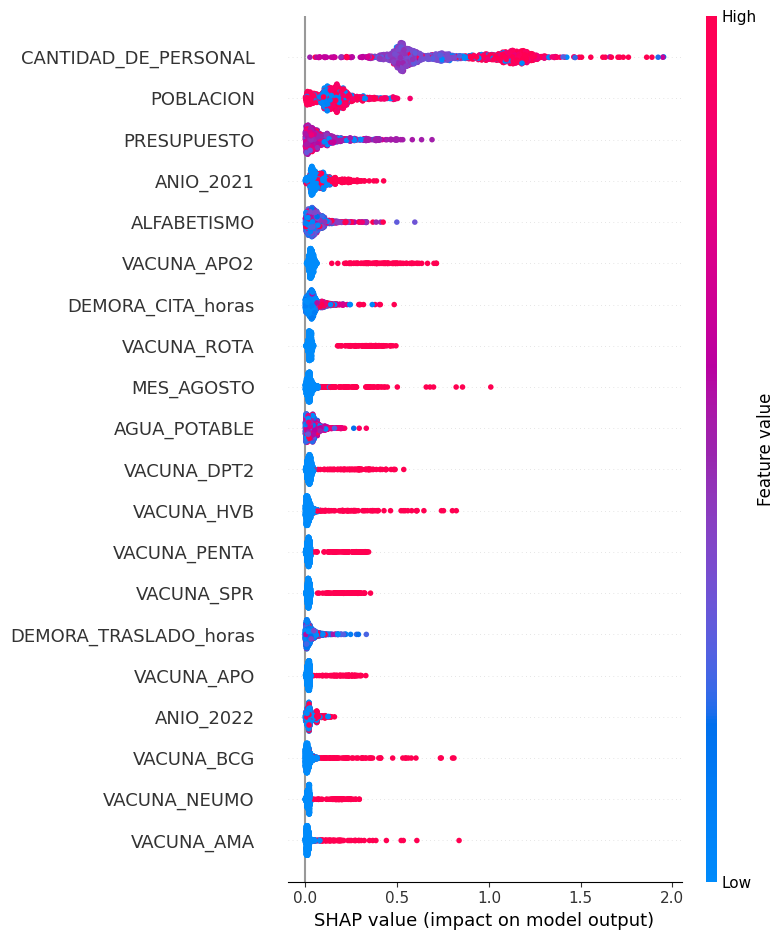

In [66]:
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(np.abs(shap_values), X_train)

In [46]:
import matplotlib.pyplot as plt

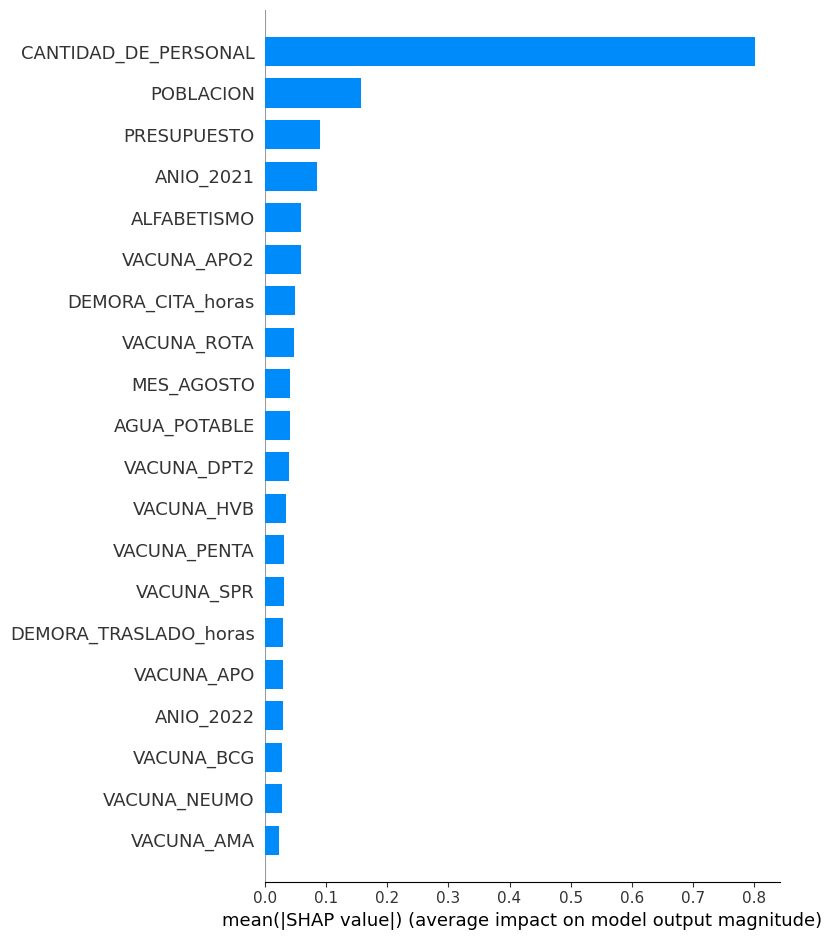

In [49]:
shap.summary_plot(shap_values, X_train,feature_names=X_train.columns, plot_type="bar")
plt.show()

In [56]:
shap_df = pd.DataFrame(shap_values, columns=X_train.columns)
shap_df.abs().describe()

,CANTIDAD_DE_PERSONAL,POBLACION,PRESUPUESTO,ALFABETISMO,AGUA_POTABLE,DEMORA_CITA_horas,DEMORA_TRASLADO_horas,ANIO_2019,ANIO_2020,ANIO_2021,...,VACUNA_APT,VACUNA_BCG,VACUNA_DPT2,VACUNA_HVB,VACUNA_INFLUENZA,VACUNA_NEUMO,VACUNA_PENTA,VACUNA_ROTA,VACUNA_SPR,VACUNA_VARI
count,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1.344000e+03,1344.000000,1344.000000,...,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000
mean,0.801681,0.156645,0.091169,0.059565,0.041727,0.048905,0.029837,4.589131e-03,0.008308,0.085741,...,0.014730,0.028309,0.040502,0.034853,0.020777,0.028307,0.032128,0.047959,0.031633,0.013255
std,0.315025,0.087991,0.098336,0.055525,0.036160,0.046120,0.033085,8.737621e-03,0.010065,0.063409,...,0.026127,0.071201,0.071794,0.079064,0.056322,0.045716,0.058735,0.083595,0.055026,0.036779
min,0.024279,0.000618,0.000092,0.000325,0.000108,0.000051,0.000012,4.212634e-07,0.000004,0.000147,...,0.000008,0.000040,0.000189,0.000093,0.000011,0.000002,0.000339,0.001403,0.002067,0.000001
25%,0.532086,0.104582,0.026004,0.025858,0.015276,0.021816,0.009749,7.120761e-04,0.002332,0.038273,...,0.005294,0.005547,0.016118,0.008683,0.003438,0.012257,0.013056,0.020948,0.013343,0.002508
50%,0.731774,0.156426,0.059205,0.046547,0.035496,0.037277,0.019658,1.346513e-03,0.005124,0.069948,...,0.008977,0.012306,0.022613,0.017085,0.006822,0.018212,0.018071,0.026276,0.017341,0.004683
75%,1.101688,0.201038,0.120373,0.076997,0.055929,0.059536,0.038528,4.964644e-03,0.009965,0.111310,...,0.012279,0.023418,0.029798,0.028413,0.016638,0.021201,0.023223,0.031283,0.023020,0.010223
max,1.952236,0.570646,0.689995,0.596187,0.331845,0.483916,0.331937,8.909944e-02,0.097074,0.426375,...,0.267027,0.809707,0.536026,0.822337,0.873289,0.293843,0.344502,0.493560,0.354789,0.502518


In [38]:
shap.plots.force(explainer.expected_value, shap_values[0], X_train.iloc[0, :])

In [63]:
shap.plots.force(explainer.expected_value, shap_values[8], X_train.iloc[0, :])

In [23]:
y_train

7     6.458338
21    6.452049
18    4.744932
13    3.688879
31    3.637586
        ...   
12    3.295837
38    3.258097
18    3.688879
19    3.784190
8     1.791759
Name: CANTIDAD, Length: 1411, dtype: float64

In [42]:
mse_eval_2 = mean_squared_error(np.exp(y_test)-1, np.exp(y_pred)-1)
mape_2 = mean_absolute_percentage_error(np.exp(y_test)-1, np.exp(y_pred)-1)
r2_2 = r2_score(np.exp(y_test)-1, np.exp(y_pred)-1)
acc_2 = 1 - mean_absolute_percentage_error(np.exp(y_test)-1, np.exp(y_pred)-1)
print(f"Error cuadrático medio en el conjunto de evaluación: {mse_eval_2}")
print(f"mape en el conjunto de evaluación: {mape_2}")
print(f"r2 en el conjunto de evaluación: {r2_2}")
print("Accuracy:", acc_2)

Error cuadrático medio en el conjunto de evaluación: 8055.073530490148
mape en el conjunto de evaluación: 0.30293445573707445
r2 en el conjunto de evaluación: 0.7811622332580852
Accuracy: 0.6970655442629256


In [43]:
y_predict_train = model.predict(X_train)

In [ ]:
dic = {
    'Y_train': np.exp(y_train)-1,
    'Y_predict_train': np.exp(y_predict_train)-1,
    'row_mape': np.abs((np.exp(y_train)-1) - (np.exp(y_predict_train)-1))/(np.exp(y_train)-1)
}

In [ ]:
Error_df = pd.DataFrame(dic).sort_values(by='row_mape', ascending=False)

In [ ]:
Error_df

In [ ]:
Error_df2 = Error_df[Error_df['row_mape'] != np.inf]
Error_df2

In [ ]:
Error_df2['row_mape'].mean()

In [ ]:
pd.concat([X_train,y_train], axis=1)['CANTIDAD'].min()

In [ ]:
importances = model.feature_importances_

# Crear un DataFrame para mostrar las importancias de las características
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

In [ ]:
importance_df